In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [5]:
from matplotlib.image import imread

In [6]:
data_dir = 'C:**\\Analysis Cell Images Using CCN\\cell_images'

In [7]:
os.listdir(data_dir)

['test', 'train']

In [8]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [9]:
test_path

'C:\\Users\\Mohamed Basher\\Desktop\\Analysis Cell Images Using CCN\\cell_images\\test\\'

In [10]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [13]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
para_cell =train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [15]:
para_cell

'C:\\Users\\Mohamed Basher\\Desktop\\Analysis Cell Images Using CCN\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [17]:
imread(para_cell).shape

(148, 142, 3)

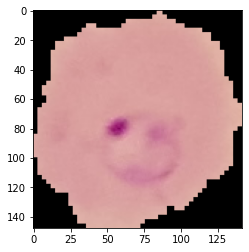

In [19]:
plt.imshow(imread(para_cell));

In [20]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [22]:
uninfected_cell =train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

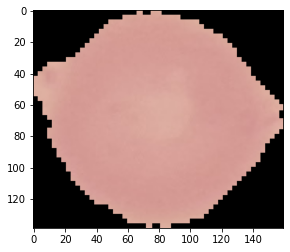

In [24]:
plt.imshow(imread(uninfected_cell));

In [27]:
len(os.listdir(train_path+'parasitized'))

12480

In [28]:
len(os.listdir(train_path+'uninfected'))

12480

In [29]:
#Check Dimenstion of images 

dim1 = []
dim2 = []

for images_filename in os.listdir(test_path+'uninfected'):
    
    img =imread(test_path+'uninfected\\'+images_filename)
    d1,d2,colors = img.shape
    
    dim1.append(d1)
    dim2.append(d2)

In [30]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


D:\anaconda3\envs\mytfenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


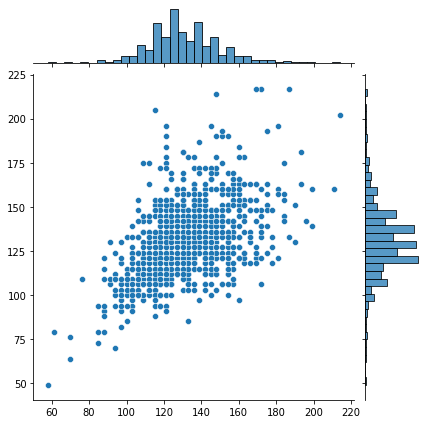

In [32]:
sns.jointplot(dim1,dim2);

In [33]:
np.mean(dim1)

130.92538461538462

In [34]:
np.mean(dim2)

130.75

In [35]:
image_shape = (130,130,3)

## Data Processing 

- ImageDataGenerator 

In [38]:
130*130*3

50700

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [41]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [43]:
image_gen.flow_from_directory(train_path);

Found 24958 images belonging to 2 classes.


In [44]:
from tensorflow.keras.models import Sequential

In [46]:
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout

In [52]:
model =Sequential()

#First Layer
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=image_shape,
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Second layer
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#Third layer
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#flatten 
model.add(Flatten())

#Dense Layer
model.add(Dense(128,
                activation='relu'))

#prevent Overfitting
model.add(Dropout(0.5))

#Final Dense Layer
model.add(Dense(1,
                activation='sigmoid'))

#Compile Model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [54]:
#Call Back
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop =EarlyStopping(monitor='val_loss',patience=2)

In [56]:
#2**4
batch_size=16 

In [58]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [59]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [60]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [62]:
resul =model.fit_generator(train_image_gen,
                            epochs=20,
                            validation_data=test_image_gen,
                            callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 285s 183ms/step - loss: 0.2391 - accuracy: 0.9254 - val_loss: 0.2169 - val_accuracy: 0.9323
Epoch 2/20
1560/1560 [==============================] - 281s 180ms/step - loss: 0.1953 - accuracy: 0.9404 - val_loss: 0.1857 - val_accuracy: 0.9373
Epoch 3/20
1560/1560 [==============================] - 279s 179ms/step - loss: 0.1828 - accuracy: 0.9445 - val_loss: 0.1706 - val_accuracy: 0.9458
Epoch 4/20
1560/1560 [==============================] - 280s 180ms/step - loss: 0.1746 - accuracy: 0.9463 - val_loss: 0.1763 - val_accuracy: 0.9431
Epoch 5/20
1560/1560 [==============================] - 282s 181ms/step - loss: 0.1859 - accuracy: 0.9418 - val_loss: 0.1762 - val_accuracy: 0.9427


In [63]:
from tensorflow.keras.models import load_model
model.save('malaria_detector.h5')

In [65]:
losses = pd.DataFrame(model.history.history)

In [67]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.239130,0.925435,0.216925,0.932308
1,0.195330,0.940420,0.185721,0.937308
2,0.182850,0.944467,0.170634,0.945769
3,0.174607,0.946270,0.176304,0.943077
4,0.185863,0.941822,0.176211,0.942692


<AxesSubplot:>

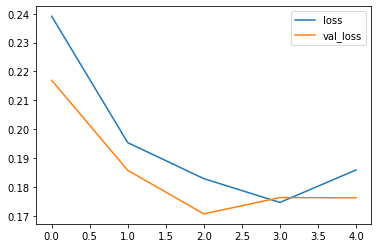

In [66]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

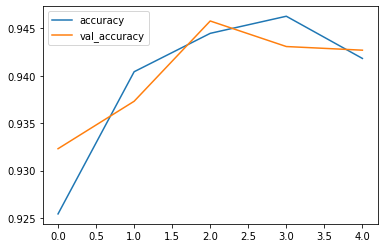

In [68]:
losses[['accuracy','val_accuracy']].plot()

In [69]:
preds = model.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [71]:
predaction = preds >0.5

In [72]:
predaction

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [76]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [75]:
from sklearn.metrics import classification_report ,confusion_matrix 

In [77]:
print(classification_report(test_image_gen.classes,predaction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [78]:
confusion_matrix(test_image_gen.classes,predaction)

array([[1218,   82],
       [  56, 1244]], dtype=int64)

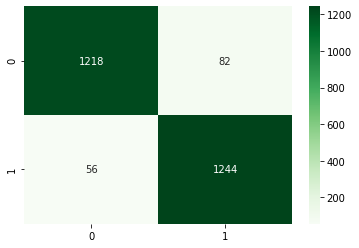

In [90]:
con_mat = confusion_matrix(test_image_gen.classes,predaction)
sns.heatmap(con_mat,annot=True,fmt='.0f',cmap='Greens');

In [91]:
para_cell

'C:\\Users\\Mohamed Basher\\Desktop\\Analysis Cell Images Using CCN\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [92]:
from tensorflow.keras.preprocessing import image 

In [93]:
my_image = image.load_img(para_cell,target_size=image_shape)

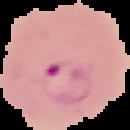

In [94]:
my_image

In [95]:
#convert image to array 

my_img_arr = image.img_to_array(my_image)

In [97]:
my_img_arr.shape #(1,130,130,3)

(130, 130, 3)

In [98]:
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [100]:
my_img_arr.shape

(1, 130, 130, 3)

In [101]:
model.predict(my_img_arr)

array([[0.00081311]], dtype=float32)

In [102]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}